In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = pd.Series(iris.target)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [9]:
df = df[df.target != 2]

In [10]:
x = np.array(df.drop(columns = ['sepal_length', 'sepal_width', 'target']))
y = np.array(df.target)

In [11]:
classifier = SVC(kernel = 'linear', C = float('inf'))
classifier.fit(x, y)

SVC(C=inf, kernel='linear')

In [12]:
w = classifier.coef_[0]

In [13]:
w

array([1.29411744, 0.82352928])

In [14]:
b = classifier.intercept_

In [15]:
b

array([-3.78823471])

In [16]:
x1 = np.linspace(1, 5.5, 100)
decision_boundary = np.zeros(100)
decision_boundary = (-w[0]/w[1]) * x1 - b/w[1]

In [17]:
decision_boundary

array([ 3.02857147,  2.9571429 ,  2.88571433,  2.81428576,  2.74285718,
        2.67142861,  2.60000004,  2.52857147,  2.4571429 ,  2.38571433,
        2.31428576,  2.24285718,  2.17142861,  2.10000004,  2.02857147,
        1.9571429 ,  1.88571433,  1.81428576,  1.74285718,  1.67142861,
        1.60000004,  1.52857147,  1.4571429 ,  1.38571433,  1.31428576,
        1.24285718,  1.17142861,  1.10000004,  1.02857147,  0.9571429 ,
        0.88571433,  0.81428576,  0.74285718,  0.67142861,  0.60000004,
        0.52857147,  0.4571429 ,  0.38571433,  0.31428576,  0.24285718,
        0.17142861,  0.10000004,  0.02857147, -0.0428571 , -0.11428567,
       -0.18571424, -0.25714282, -0.32857139, -0.39999996, -0.47142853,
       -0.5428571 , -0.61428567, -0.68571424, -0.75714282, -0.82857139,
       -0.89999996, -0.97142853, -1.0428571 , -1.11428567, -1.18571424,
       -1.25714282, -1.32857139, -1.39999996, -1.47142853, -1.5428571 ,
       -1.61428567, -1.68571424, -1.75714282, -1.82857139, -1.89

In [18]:
margin = 1/w[1]

In [19]:
margin

1.2142859118931788

In [20]:
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

In [21]:
support_vector = classifier.support_vectors_

(0.7, 5.5, 0.0, 2.0)

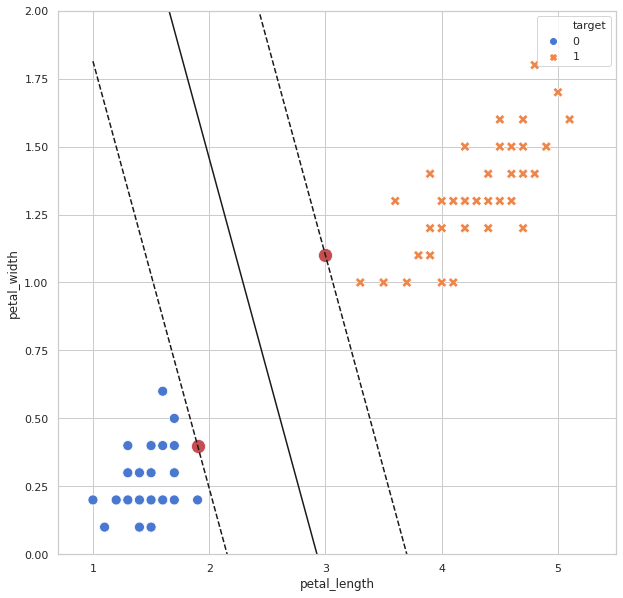

In [22]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = df[df.target != 2].petal_length, y = df[df.target != 2].petal_width, hue = df[df.target != 2].target, style = df[df.target != 2].target, palette = 'muted', s = 100)
ax = sns.scatterplot(x = support_vector[:, 0], y = support_vector[:, 1], s = 200, color = 'r')
ax.plot(x1, decision_boundary, 'k-')
ax.plot(x1, gutter_up, 'k--')
ax.plot(x1, gutter_down, 'k--')
plt.axis([0.7, 5.5, 0, 2])

In [23]:
x_outliers = np.array([[3.2, 0.8]])
y_outliers = np.array([0])

In [24]:
x1 = np.concatenate([x, x_outliers], axis = 0)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y1 = np.concatenate([y, y_outliers], axis = 0)

In [27]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [28]:
svm_clf2 = SVC(kernel = 'linear', C = 10**9)
svm_clf2.fit(x1, y1)

SVC(C=1000000000, kernel='linear')

In [29]:
w = svm_clf2.coef_[0]
b = svm_clf2.intercept_
xs = np.linspace(1, 5.5, 101)
decision_boundary = np.zeros(100)
decision_boundary = (-w[0]/w[1]) * xs - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
support_vector = svm_clf2.support_vectors_

(0.7, 5.5, 0.0, 2.0)

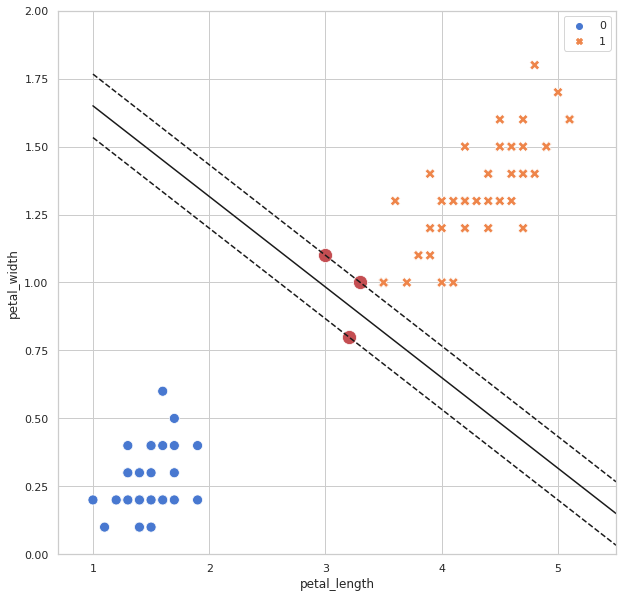

In [30]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = x1[:,0], y = x1[:, 1], hue = y1, style = y1, palette = 'muted', s = 100)
ax = sns.scatterplot(x = support_vector[:, 0], y = support_vector[:, 1], s = 200, color = 'r')
ax.plot(xs, decision_boundary, 'k-')
ax.plot(xs, gutter_up, 'k--')
ax.plot(xs, gutter_down, 'k--')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.axis([0.7, 5.5, 0, 2])

In [34]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [35]:
df_iris['target'] = pd.Series(iris.target)

In [37]:
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [38]:
x = np.array(df_iris.drop(columns = ['sepal_length', 'sepal_width', 'target'], axis = 1))

In [39]:
y = np.array((df_iris.target == 2).astype(np.float64))

In [40]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, loss = 'hinge', random_state = 42)
svm_clf2 = LinearSVC(C = 100, loss = 'hinge', random_state = 42)

In [46]:
scaled_svm_clf1 = Pipeline([('scaler', StandardScaler()), ('linear_svc', svm_clf1)])
scaled_svm_clf2 = Pipeline([('scaler', StandardScaler()), ('linear_svc', svm_clf2)])

In [47]:
scaled_svm_clf1.fit(x, y)
scaled_svm_clf2.fit(x, y)

/home/gokul/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [48]:
a = 1

In [49]:
b = 2

In [51]:
c = {a :'344', b : 444}

In [52]:
c

{1: '344', 2: 444}

In [53]:
a = [1]

In [54]:
b = [2]

In [55]:
c = {a : 3, b : 5}

TypeError: unhashable type: 'list'

In [57]:
a = np.array([[1,1,1], [0, 0, 1], [1, 0, 0]])

In [58]:
a

array([[1, 1, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [59]:
np.sum(a)

5

In [60]:
b = a[0:3, 1:3]

In [61]:
b

array([[1, 1],
       [0, 1],
       [0, 0]])

In [62]:
b[:,:] = 2

In [63]:
b

array([[2, 2],
       [2, 2],
       [2, 2]])

In [64]:
np.sum(b)

12